In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data= pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/imputed_dataV64.csv")
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,data$class
0,-0.024558,0.30051,0.10733,1.8368,34.382,-0.026711,-0.020067,2.2519,1.06670,0.67673,...,0.062497,-0.036289,0.93750,0.25454,13.6320,3.6930,69.389,5.2602,0.882600,0
1,0.639180,0.00000,1.00000,1.4059,29.678,-1.139300,0.760520,38.7960,1.11850,1.00000,...,0.679830,0.639180,0.32014,0.00000,6.5721,37.8860,0.000,7.0379,0.048449,0
2,-0.440760,0.47723,0.19260,1.4678,34.555,0.000000,-0.440760,1.0954,1.51860,0.52277,...,-0.290590,-0.843130,1.28710,0.12538,4.0387,2.5649,98.950,3.6887,3.837600,0
3,0.119520,0.17679,0.63546,4.5944,117.650,0.251540,0.148750,4.5826,1.12630,0.81017,...,0.112110,0.147520,0.88789,0.00000,8.9302,10.2870,40.355,9.0448,8.516900,0
4,0.230400,0.27095,0.23762,2.5745,-26.928,0.617540,0.282690,2.6907,0.80411,0.72905,...,0.459570,0.316020,0.62320,0.16465,7.9274,6.6605,68.502,5.3283,1.315000,0


outlier 많은 항목 제거

In [23]:
outlier = [999,3134,3528,2556,2655,6425,6233,4942,4612,1935,2064,6818,1594,2100,4680,4995,4120,5305,5936,5811]
data = data.drop(outlier, axis = 0)

In [24]:
data.shape

(6835, 64)

corr높은변수들 중 FA, PCA 로 차원축소할 변수들 제외한 변수들 삭제 

In [9]:
data.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44',
       'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51',
       'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58',
       'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'data$class'],
      dtype='object')

In [25]:
remove_col =np.array(['Attr8', 'Attr50', 'Attr36', 'Attr4', 'Attr40', 'Attr50', 'Attr24',
       'Attr12', 'Attr16', 'Attr13', 'Attr28', 'Attr53', 'Attr32', 'Attr52',
       'Attr33', 'Attr34'])
data = data.drop(remove_col, axis =1)

In [11]:
len(remove_col)

16

In [27]:
NAnum = data.isna().sum()
NAnum[NAnum !=0]

Attr17     15
Attr26     15
Attr44     14
Attr46     28
Attr54    162
Attr56     14
dtype: int64

NA 남아있는건 평균으로 imputation 하자

In [32]:
NAcol = ['Attr17','Attr26','Attr44','Attr54','Attr56']

In [34]:
for i in NAcol :
    data[i] = data[i].fillna(np.mean(data[i]))

In [42]:
data.isna().sum()

Attr1          0
Attr2          0
Attr3          0
Attr5          0
Attr6          0
Attr7          0
Attr9          0
Attr10         0
Attr11         0
Attr14         0
Attr15         0
Attr17         0
Attr18         0
Attr19         0
Attr20         0
Attr21         0
Attr22         0
Attr23         0
Attr25         0
Attr26         0
Attr27         0
Attr29         0
Attr30         0
Attr31         0
Attr35         0
Attr38         0
Attr39         0
Attr41         0
Attr42         0
Attr43         0
Attr44         0
Attr45         0
Attr46        28
Attr47         0
Attr48         0
Attr49         0
Attr51         0
Attr54         0
Attr55         0
Attr56         0
Attr57         0
Attr58         0
Attr59         0
Attr60         0
Attr61         0
Attr62         0
Attr63         0
Attr64         0
data$class     0
dtype: int64

NA 제거 완료

* 축소할 변수들
- Attr2, Attr3, Attr10, Attr25, Attr 38, Attr 51 
- Attr1, Attr7, Attr11, Attr14, Attr22, Attr35, Attr48
- Attr19, Attr23, Attr30, Attr31, Attr39, Attr43, Attr44, Attr49, Attr56, Attr58, Attr62

In [43]:
data.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr5', 'Attr6', 'Attr7', 'Attr9', 'Attr10',
       'Attr11', 'Attr14', 'Attr15', 'Attr17', 'Attr18', 'Attr19', 'Attr20',
       'Attr21', 'Attr22', 'Attr23', 'Attr25', 'Attr26', 'Attr27', 'Attr29',
       'Attr30', 'Attr31', 'Attr35', 'Attr38', 'Attr39', 'Attr41', 'Attr42',
       'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49',
       'Attr51', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59',
       'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'data$class'],
      dtype='object')

In [57]:
fea1 = data.loc[:,["Attr2", "Attr3", "Attr10", "Attr25", "Attr38", "Attr51"]]
fea2 = data.loc[:,["Attr1", "Attr7", "Attr11", "Attr14", "Attr22", "Attr35", "Attr48"]]
fea3 = data.loc[:,["Attr19", "Attr23", "Attr30", "Attr31", "Attr39", "Attr43", "Attr44", "Attr49", "Attr56", "Attr58", "Attr62"]]

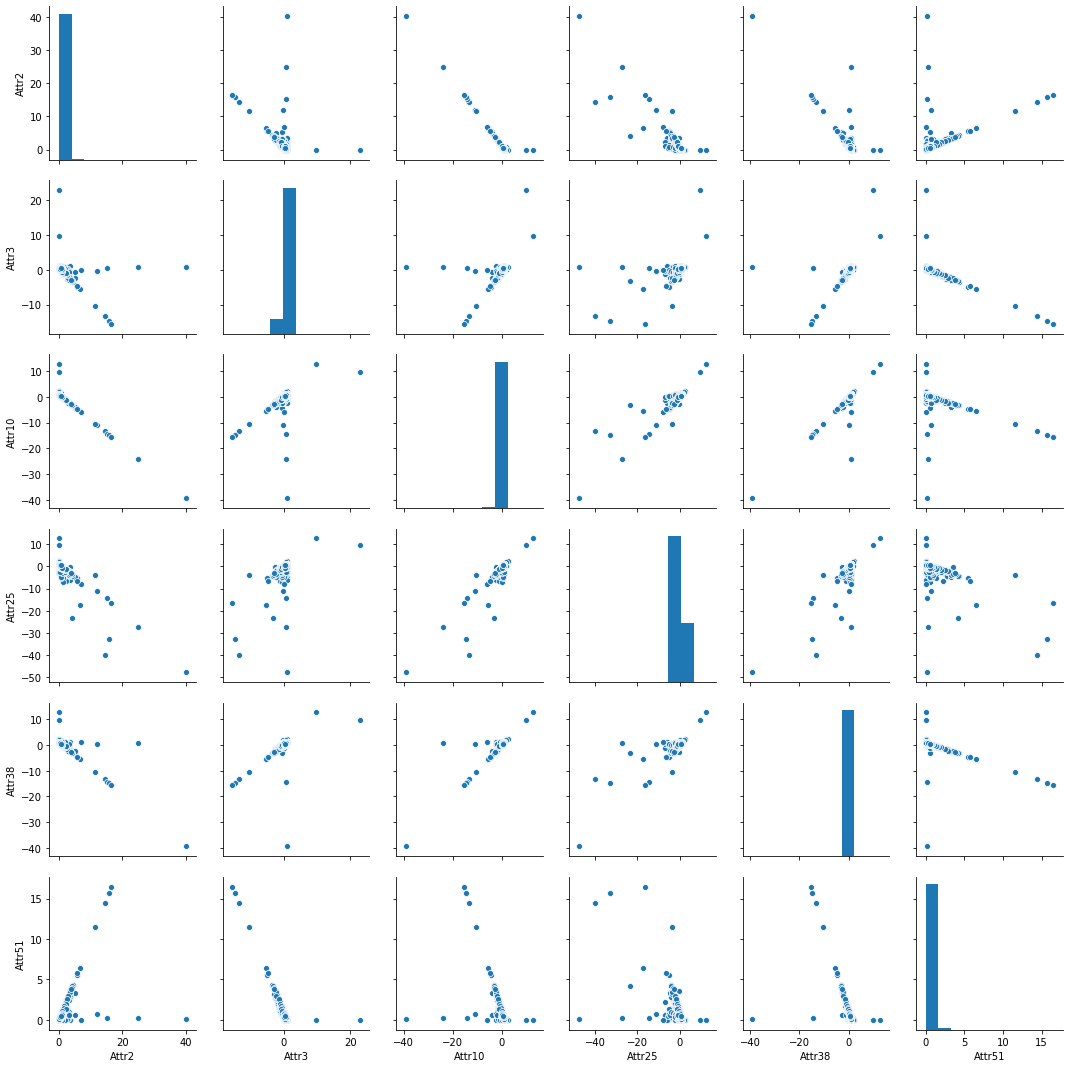

In [58]:
sns.pairplot(fea1)

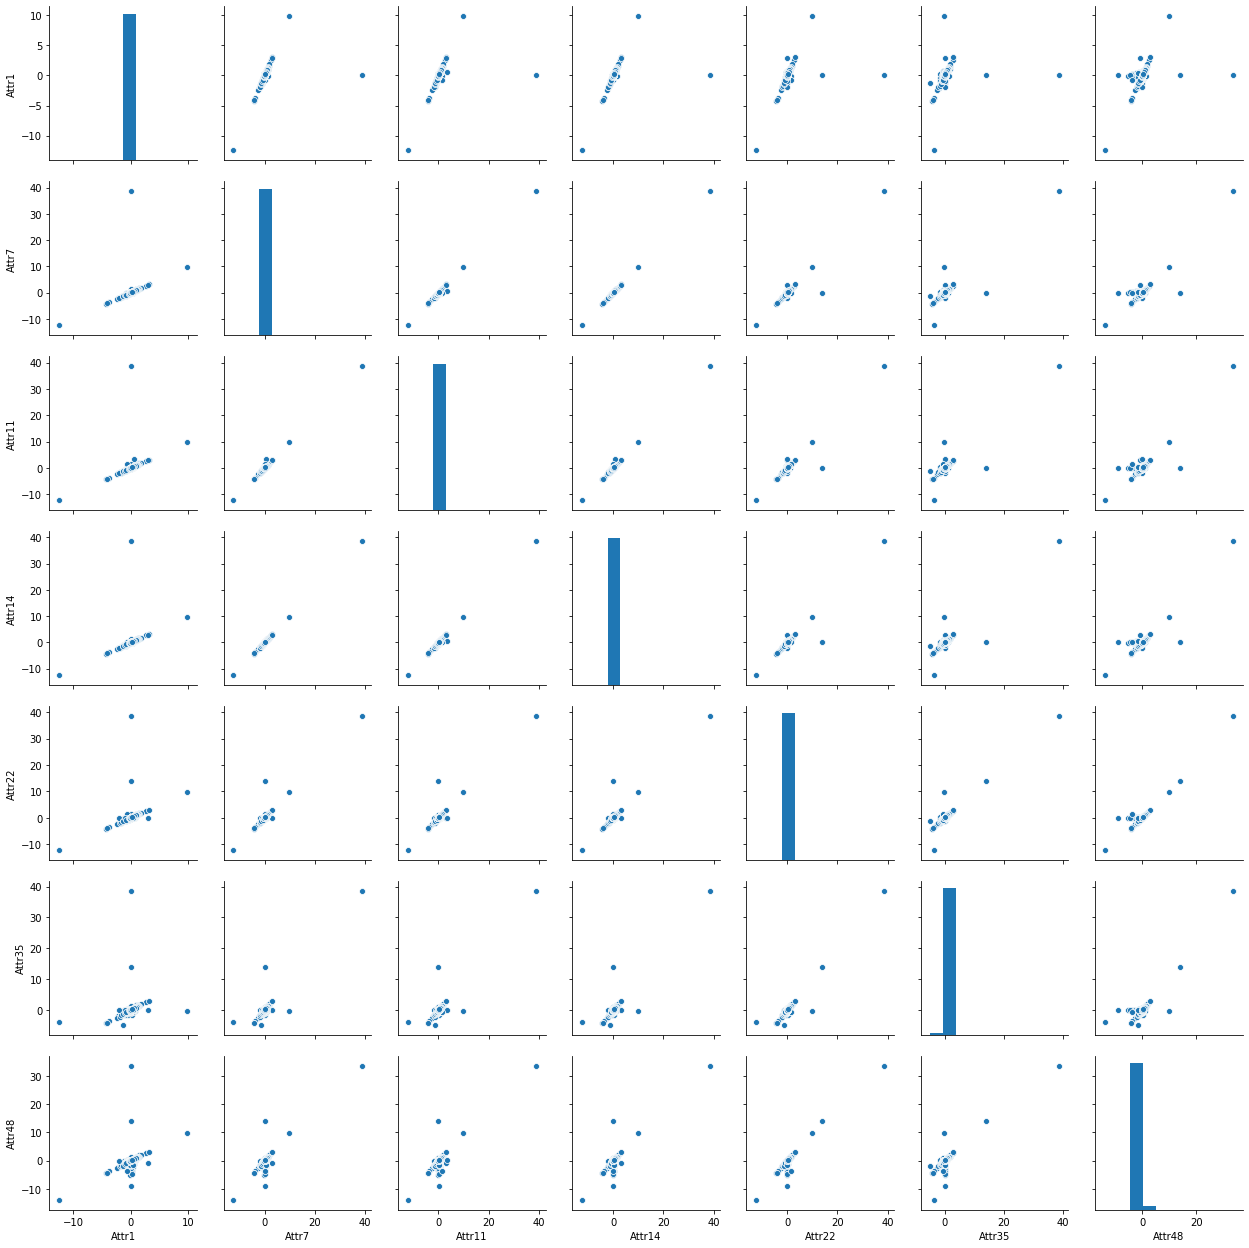

In [59]:
sns.pairplot(fea2)

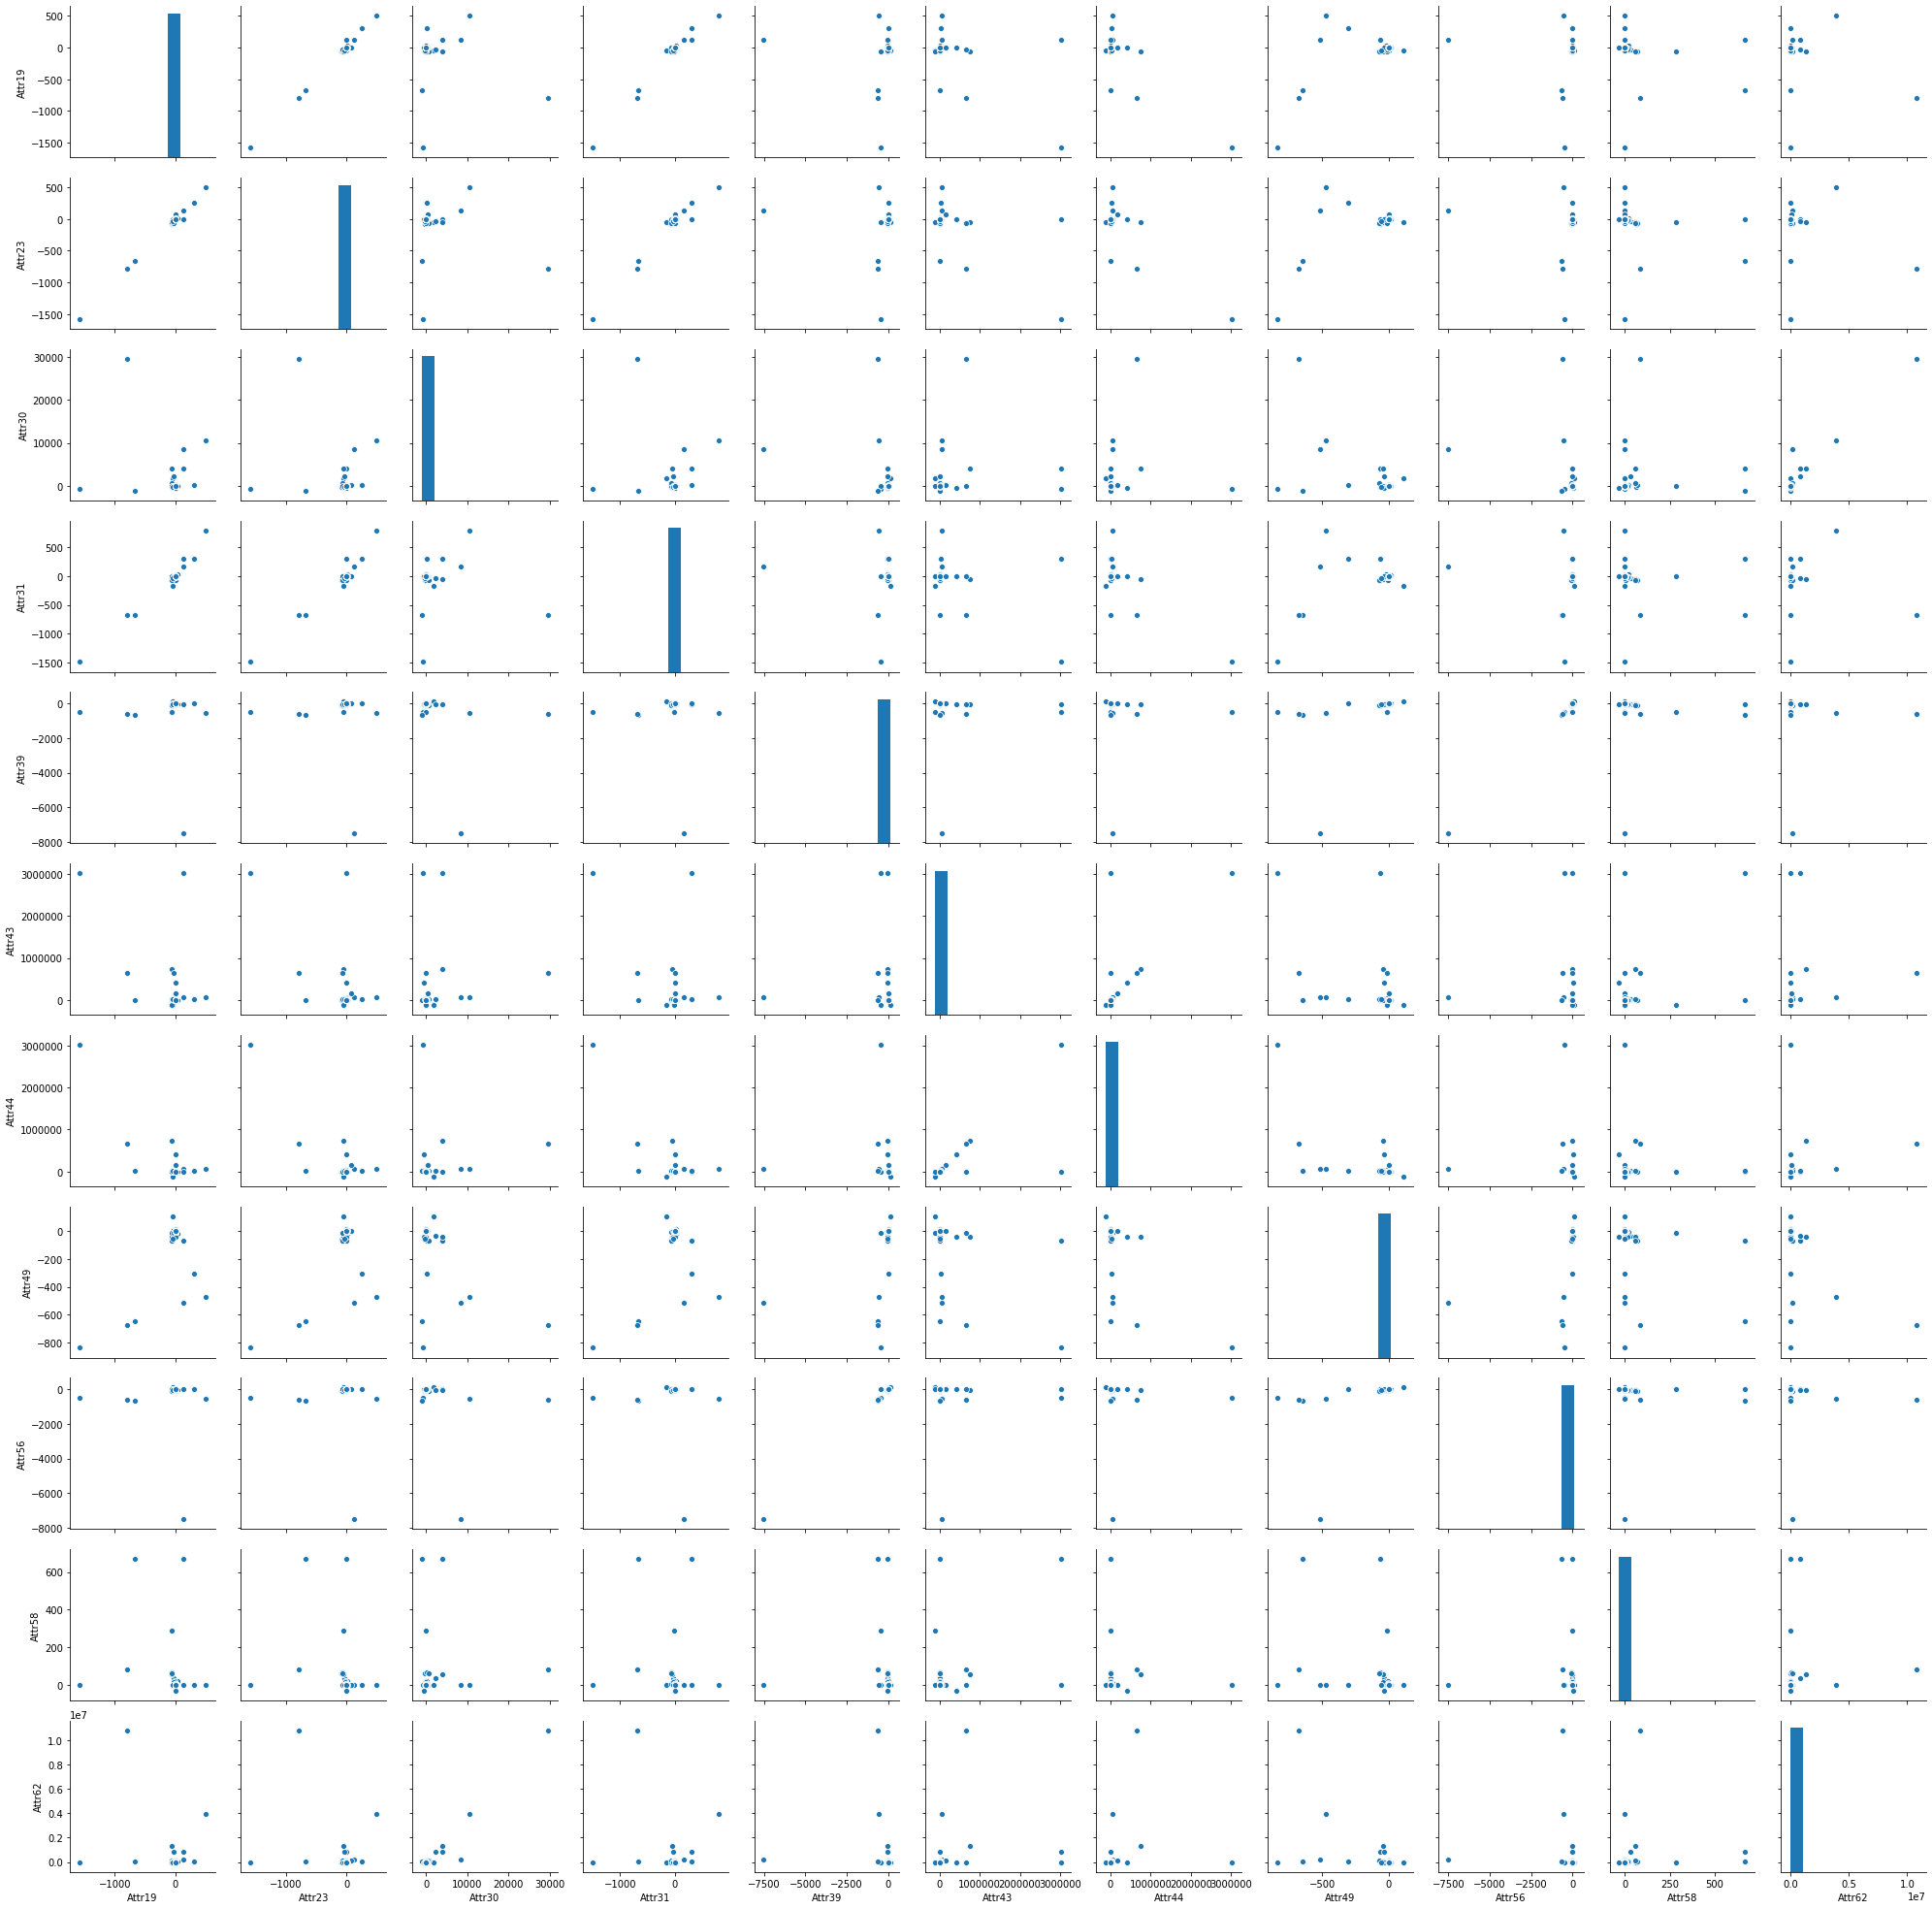

In [60]:
sns.pairplot(fea3)